# STEP1 : READING AND IMPORTING THE DATA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import r2_score

plt.style.use('ggplot')

In [2]:
lead = pd.read_csv("Leads.csv")

In [3]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# STEP 2: Inspecting the Dataset

In [4]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
lead.shape

(9240, 37)

In [6]:
lead.describe(include='all')       #Describing Data

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,...,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,...,1,6,7,3,3,NaN,NaN,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,...,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,...,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,...,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,...,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,...,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


# Step 3: Cleaning the NULL Values

### Checking for null values


In [7]:
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

### Converting some binary values Yes to 1 and No to 0

In [8]:
#Encoding the variable with yes/no labels
for feature in ['Do Not Email','Do Not Call','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','A free copy of Mastering The Interview','I agree to pay the amount through cheque','Update me on Supply Chain Content']:
  lead[feature]=lead[feature].apply(lambda x: 1 if x=='Yes' else 0)
lead.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,0,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [9]:
# Converting 'Select' values in the data set as null 
lead = lead.replace('Select', np.nan,regex=True)
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,0,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,NaN,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,NaN,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [10]:
# Calculating the percentage of na/null values in the dataset
round(100*lead.isna().sum()/len(lead),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
#Dropping columns with more than 40% null values

cols=lead.columns

for i in cols:
    if((100*(lead[i].isnull().sum()/len(lead))) >= 40):
        lead.drop(i, 1, inplace = True)

In [12]:
# Again checking null values percentage
round(100*lead.isna().sum()/len(lead),2)


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [13]:
lead.shape


(9240, 30)

#### As you might be able to interpret, the variable 'City' won't be of any use in our analysis. So it's best that we drop it

In [14]:
lead.drop(['City'], axis = 1, inplace = True)

In [15]:
# Same goes for the variable 'Country'

lead.drop(['Country'], axis = 1, inplace = True)

In [16]:
## Let's now check the percentage of missing values in each column

round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [17]:
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

### Now recall that there are a few columns in which there is a level called 'Select' which basically means that the student had not selected the option for that particular column which is why it shows 'Select'. These values are as good as missing values and hence we need to identify the value counts of the level 'Select' in all the columns that it is present.

In [18]:
# Get the value counts of all the columns

for column in lead:
    print(lead[column].astype('category').value_counts())
    print('___________________________________________________')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
___________________________________________________
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
___________________________________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
__________________

In [19]:

lead['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

### Specialization - This column has 37% missing values

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Business Administration'),
  Text(1, 0, 'Media and Advertising'),
  Text(2, 0, 'Supply Chain Management'),
  Text(3, 0, 'IT Projects Management'),
  Text(4, 0, 'Finance Management'),
  Text(5, 0, 'Travel and Tourism'),
  Text(6, 0, 'Human Resource Management'),
  Text(7, 0, 'Marketing Management'),
  Text(8, 0, 'Banking, Investment And Insurance'),
  Text(9, 0, 'International Business'),
  Text(10, 0, 'E-COMMERCE'),
  Text(11, 0, 'Operations Management'),
  Text(12, 0, 'Retail Management'),
  Text(13, 0, 'Services Excellence'),
  Text(14, 0, 'Hospitality Management'),
  Text(15, 0, 'Rural and Agribusiness'),
  Text(16, 0, 'Healthcare Management'),
  Text(17, 0, 'E-Business')])

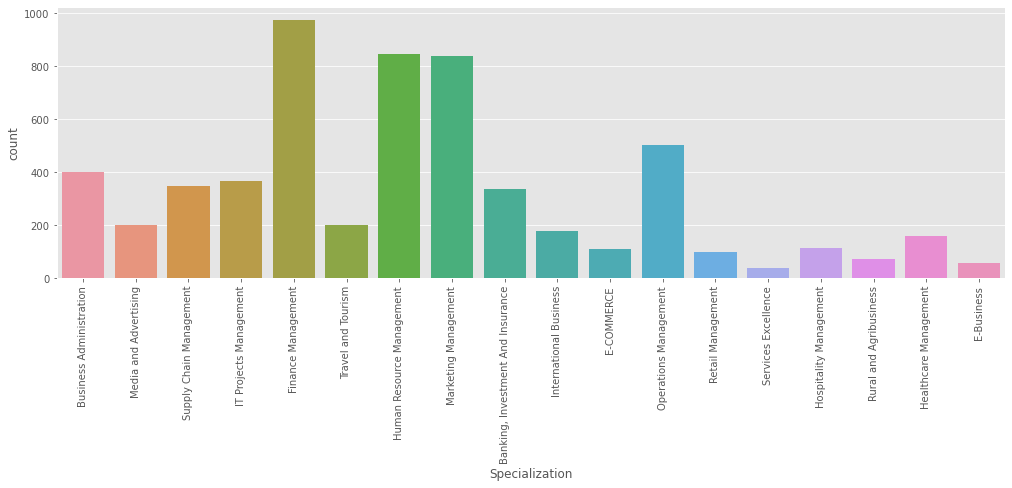

In [20]:
plt.figure(figsize=(17,5))
sns.countplot(lead['Specialization'])
plt.xticks(rotation=90)

#### Because of 37% missing values present in the Specialization column,it may be possible that the lead may leave this column blank if he may be a student or not having any specialization or his specialization is not there in the options given. 

In [21]:
# Drop the null values rows in the column 'Specialization'

lead = lead[~pd.isnull(lead['Specialization'])]

#### What is your current occupation - This column has 29.11% missing values

In [22]:
lead['What is your current occupation'].value_counts(dropna=False)

Unemployed              3772
NaN                     1257
Working Professional     675
Student                  125
Other                     15
Housewife                 10
Businessman                6
Name: What is your current occupation, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Student'),
  Text(1, 0, 'Unemployed'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

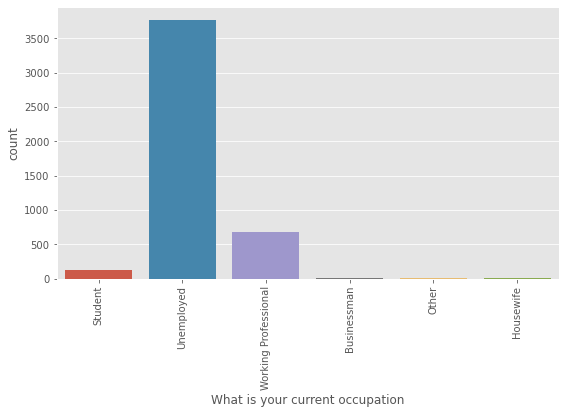

In [23]:
plt.figure(figsize=(9,5))
sns.countplot(lead['What is your current occupation'])
plt.xticks(rotation=90)

In [24]:
lead = lead[~pd.isnull(lead['What is your current occupation'])]

In [25]:
# Check the number of null values again

lead.isnull().sum()



Prospect ID                                        0
Lead Number                                        0
Lead Origin                                        0
Lead Source                                        8
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                       61
Total Time Spent on Website                        0
Page Views Per Visit                              61
Last Activity                                     49
Specialization                                     0
What is your current occupation                    0
What matters most to you in choosing a course      1
Search                                             0
Magazine                                           0
Newspaper Article                                  0
X Education Forums                                 0
Newspaper                                     

In [26]:
lead['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      4599
Flexibility & Convenience       2
NaN                             1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

#### 'What matters most to you in choosing a course'- this column has 26% missing values


(array([0, 1, 2]),
 [Text(0, 0, 'Better Career Prospects'),
  Text(1, 0, 'Flexibility & Convenience'),
  Text(2, 0, 'Other')])

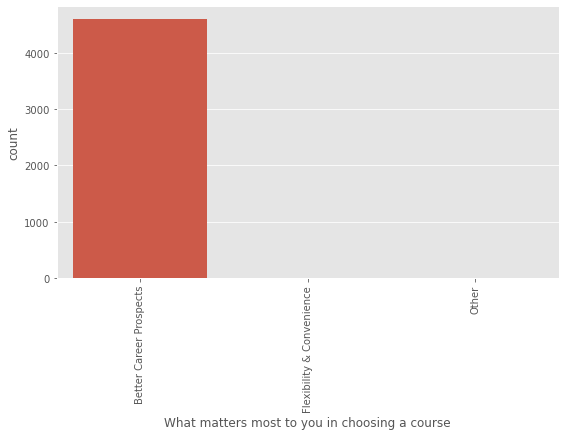

In [27]:
plt.figure(figsize=(9,5))
sns.countplot(lead['What matters most to you in choosing a course'])
plt.xticks(rotation=90)

In [28]:
# Drop the null value rows present in the variable 'What matters most to you in choosing a course'

lead.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [29]:
# Check the number of null values again

lead.isnull().sum()

Prospect ID                                   0
Lead Number                                   0
Lead Origin                                   0
Lead Source                                   8
Do Not Email                                  0
Do Not Call                                   0
Converted                                     0
TotalVisits                                  61
Total Time Spent on Website                   0
Page Views Per Visit                         61
Last Activity                                49
Specialization                                0
What is your current occupation               0
Search                                        0
Magazine                                      0
Newspaper Article                             0
X Education Forums                            0
Newspaper                                     0
Digital Advertisement                         0
Through Recommendations                       0
Receive More Updates About Our Courses  

### Dropping Unnecessary columns 

In [30]:
lead.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque','Tags'], axis = 1, inplace = True)

In [31]:
lead.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                                8
Do Not Email                               0
Converted                                  0
TotalVisits                               61
Total Time Spent on Website                0
Page Views Per Visit                      61
Last Activity                             49
Specialization                             0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [32]:
#Since now the number of null values present in the columns are quite small we can simply drop the rows in which these null values are present.

In [33]:
# Drop the null value rows in the column 'TotalVisits'

lead = lead[~pd.isnull(lead['TotalVisits'])]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '10.0'),
  Text(11, 0, '11.0'),
  Text(12, 0, '12.0'),
  Text(13, 0, '13.0'),
  Text(14, 0, '14.0'),
  Text(15, 0, '15.0'),
  Text(16, 0, '16.0'),
  Text(17, 0, '17.0'),
  Text(18, 0, '18.0'),
  Text(19, 0, '19.0'),
  Text(20, 0, '20.0'),
  Text(21, 0, '21.0'),
  Text(22, 0, '22.0'),
  Text(23, 0, '23.0'),
  Text(24, 0, '24.0'),
  Text(25, 0, '25.0'),
  Text(26, 0, '26.0'),
  Text(27, 0, '27.0'),
  Text(28, 0, '28.0'),
  Text(29, 0, '29.0'),
  Text(30, 0, '30.0'),
  Text(31, 0, '43.0'),
  Text(32, 0, '55.0'),
  Text(33, 0, '115.0'),
  Text(34, 0, '251.0')])

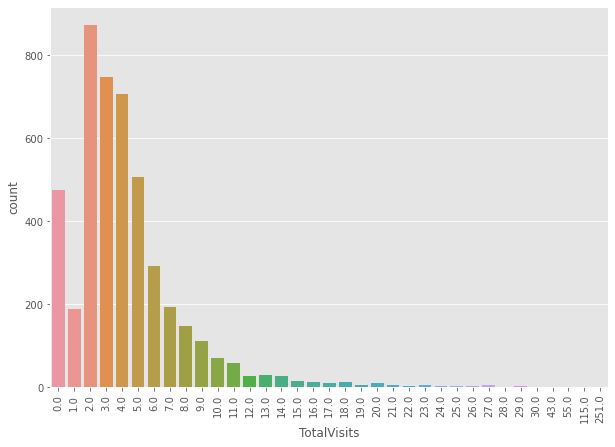

In [34]:
# Visualizing TotalVisits column
plt.figure(figsize=(10,7))
sns.countplot(lead['TotalVisits'])
plt.xticks(rotation=90)

In [35]:
lead['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    4542.000000
mean        4.287539
std         5.450110
min         0.000000
5%          0.000000
25%         2.000000
50%         3.000000
75%         5.000000
90%         8.000000
95%        11.000000
99%        19.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [36]:
percentiles = lead['TotalVisits'].quantile([0.05,0.95]).values
lead['TotalVisits'][lead['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead['TotalVisits'][lead['TotalVisits'] >= percentiles[1]] = percentiles[1]

In [37]:
lead.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               7
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [38]:
# Drop the null value rows in the column 'Lead Source'

lead = lead[~pd.isnull(lead['Lead Source'])]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Direct Traffic'),
  Text(1, 0, 'Google'),
  Text(2, 0, 'Organic Search'),
  Text(3, 0, 'Referral Sites'),
  Text(4, 0, 'Olark Chat'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'Pay per Click Ads'),
  Text(9, 0, 'bing'),
  Text(10, 0, 'Social Media'),
  Text(11, 0, 'WeLearn'),
  Text(12, 0, 'Click2call'),
  Text(13, 0, 'testone'),
  Text(14, 0, 'Press_Release')])

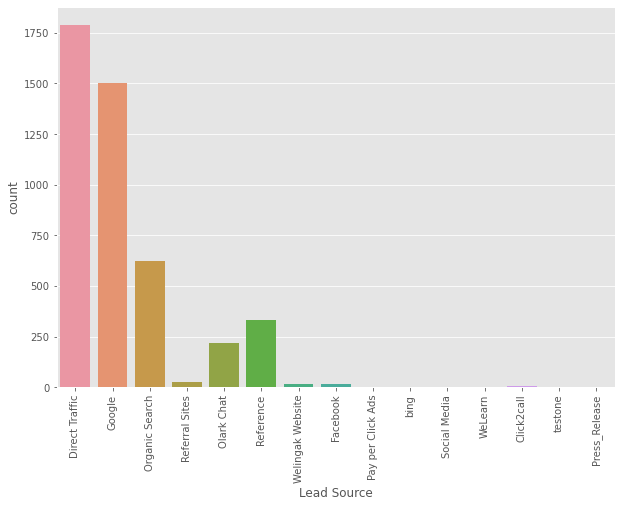

In [39]:
# Visualizing Lead Source column
plt.figure(figsize=(10,7))
sns.countplot(lead['Lead Source'])
plt.xticks(rotation=90)

In [40]:
lead.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [41]:
lead.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

# STEP 4: EDA

In [42]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.00,Email Opened,Business Administration,Student,0,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,0,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,0,1,2.0,1640,2.00,Email Opened,Supply Chain Management,Unemployed,0,Modified
10,2a369e35-ca95-4ca9-9e4f-9d27175aa320,660608,Landing Page Submission,Organic Search,0,1,8.0,1351,8.00,Email Opened,Travel and Tourism,Unemployed,0,Email Opened
11,9bc8ce93-6144-49e0-9f9d-080fc980f83c,660570,Landing Page Submission,Direct Traffic,0,1,8.0,1343,2.67,Page Visited on Website,Human Resource Management,Unemployed,0,Page Visited on Website


In [43]:
lead.shape

(4535, 14)

In [44]:
##Checking for duplicates

In [45]:
lead[lead.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity


In [46]:
#We see there are no duplicate records in our lead dataset

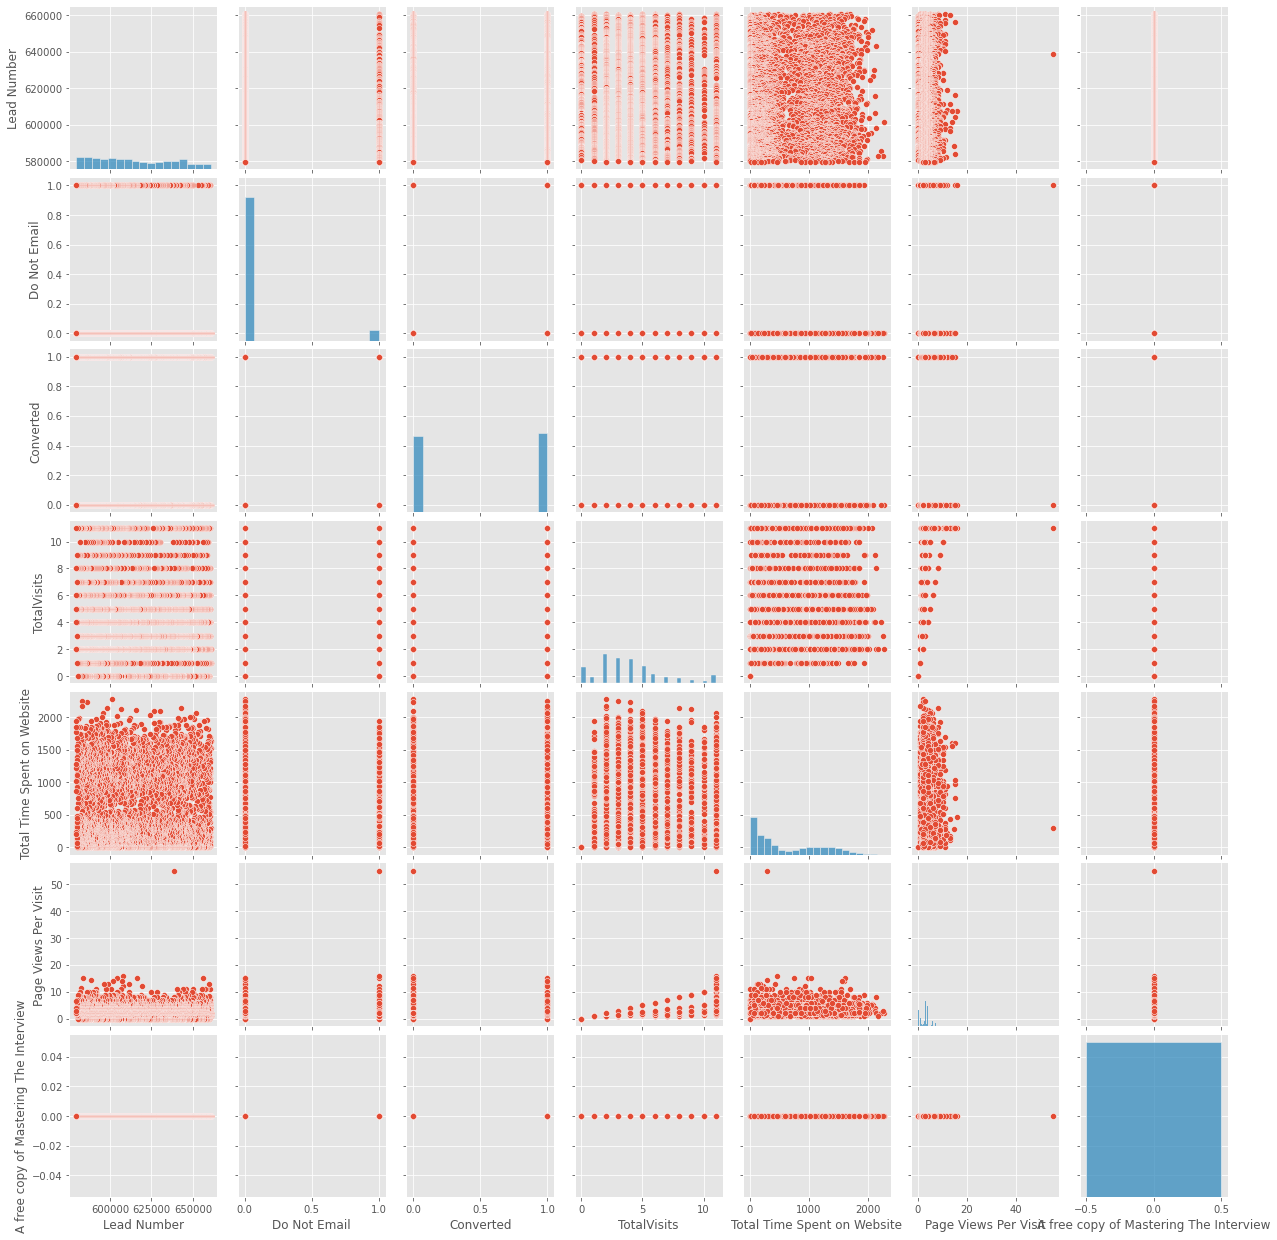

In [47]:
#visualizing the numerical variales
sns.pairplot(lead)
plt.show()

# univariate analysis

In [48]:
##Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0)

In [49]:
Converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100
Converted

51.06945975744212

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

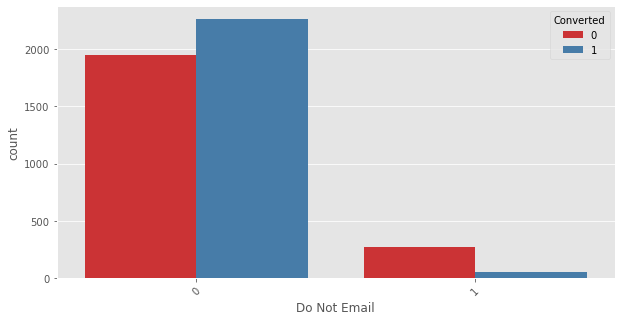

In [50]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead,palette='Set1')
plt.xticks(rotation = 45)

### Inference
Most entries are 'Yes'. Many Inferences can be drawn with this parameter.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Direct Traffic'),
  Text(1, 0, 'Google'),
  Text(2, 0, 'Organic Search'),
  Text(3, 0, 'Referral Sites'),
  Text(4, 0, 'Olark Chat'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'Pay per Click Ads'),
  Text(9, 0, 'bing'),
  Text(10, 0, 'Social Media'),
  Text(11, 0, 'WeLearn'),
  Text(12, 0, 'Click2call'),
  Text(13, 0, 'testone'),
  Text(14, 0, 'Press_Release')])

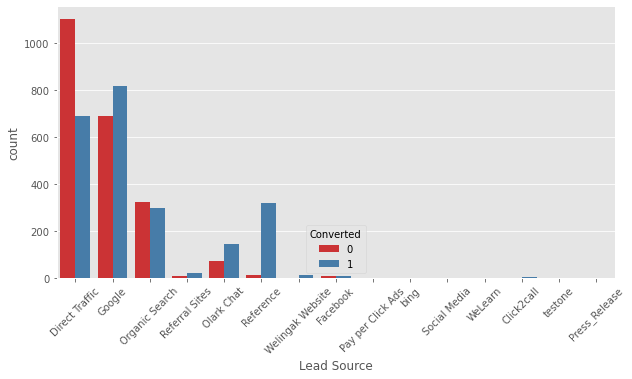

In [51]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead,palette='Set1')
plt.xticks(rotation = 45)

In [52]:
#To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search. Direct traffic, and google leads and generate more leads from reference and welingak website.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Business Administration'),
  Text(1, 0, 'Media and Advertising'),
  Text(2, 0, 'Supply Chain Management'),
  Text(3, 0, 'Travel and Tourism'),
  Text(4, 0, 'Human Resource Management'),
  Text(5, 0, 'Marketing Management'),
  Text(6, 0, 'Banking, Investment And Insurance'),
  Text(7, 0, 'Finance Management'),
  Text(8, 0, 'International Business'),
  Text(9, 0, 'E-COMMERCE'),
  Text(10, 0, 'Operations Management'),
  Text(11, 0, 'Retail Management'),
  Text(12, 0, 'IT Projects Management'),
  Text(13, 0, 'Services Excellence'),
  Text(14, 0, 'Hospitality Management'),
  Text(15, 0, 'Rural and Agribusiness'),
  Text(16, 0, 'Healthcare Management'),
  Text(17, 0, 'E-Business')])

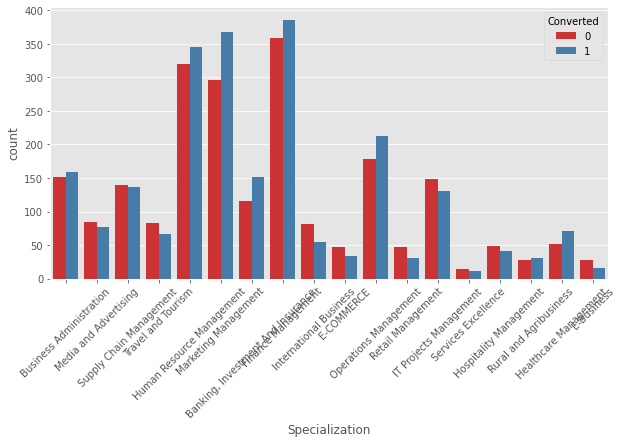

In [53]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Specialization", hue = "Converted", data = lead,palette='Set1')
plt.xticks(rotation = 45)

In [54]:
#Total VISITS

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

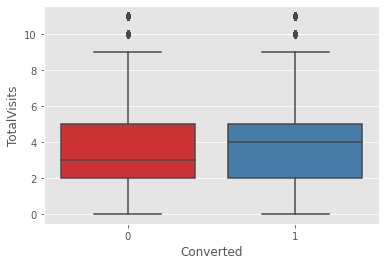

In [55]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead,palette='Set1')

In [56]:
#Inference
###Median for converted and not converted leads are the same.
###Nothing can be concluded on the basis of Total Visits.

In [57]:
 #Total Time Spent on Website

In [58]:
lead['Total Time Spent on Website'].describe()

count    4535.000000
mean      626.625358
std       568.094959
min         0.000000
25%       127.000000
50%       391.000000
75%      1119.500000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

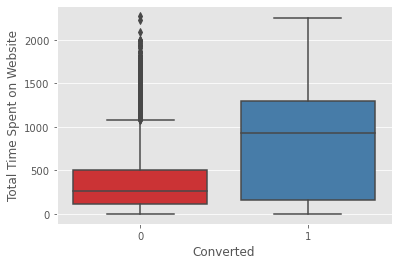

In [59]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead,palette='Set1')

### Inference¶
Leads spending more time on the website are more likely to be converted.

In [60]:
#Page Views Per Visit

In [61]:
lead['Page Views Per Visit'].describe()

count    4535.000000
mean        2.937385
std         2.143495
min         0.000000
25%         2.000000
50%         2.670000
75%         4.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

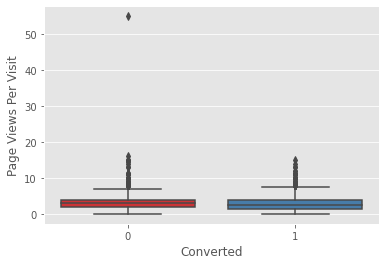

In [62]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead,palette='Set1')

In [63]:
#Last Activity 

In [64]:
lead['Last Activity'].describe()

count             4535
unique              16
top       Email Opened
freq              1810
Name: Last Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Email Opened'),
  Text(1, 0, 'Unreachable'),
  Text(2, 0, 'Page Visited on Website'),
  Text(3, 0, 'Email Bounced'),
  Text(4, 0, 'Converted to Lead'),
  Text(5, 0, 'Email Link Clicked'),
  Text(6, 0, 'Form Submitted on Website'),
  Text(7, 0, 'Unsubscribed'),
  Text(8, 0, 'Had a Phone Conversation'),
  Text(9, 0, 'View in browser link Clicked'),
  Text(10, 0, 'Olark Chat Conversation'),
  Text(11, 0, 'SMS Sent'),
  Text(12, 0, 'Visited Booth in Tradeshow'),
  Text(13, 0, 'Approached upfront'),
  Text(14, 0, 'Email Received'),
  Text(15, 0, 'Email Marked Spam')])

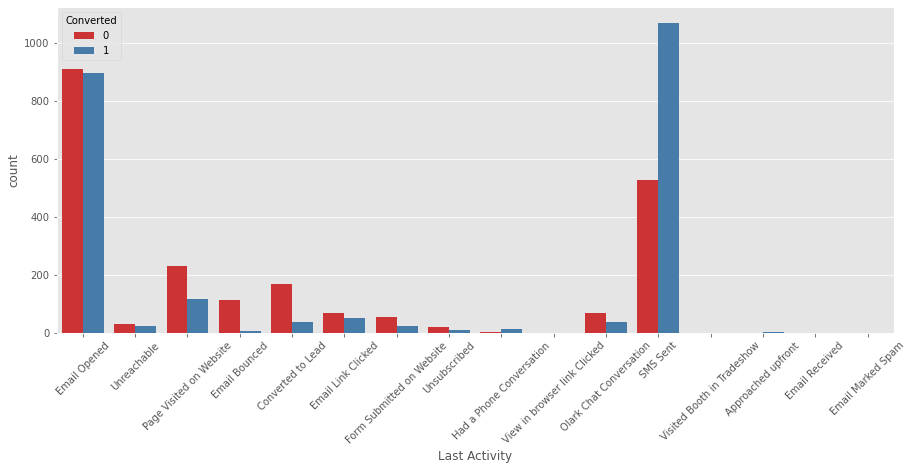

In [65]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead,palette='Set1')
plt.xticks(rotation = 45)

### Inference¶
Most of the lead have their SMS SENT as their last activity.
Conversion rate for leads with last activity as SMS Sent is almost 100%.

In [66]:
#What is your current occupation"

In [67]:
lead['What is your current occupation'].describe()

count           4535
unique             6
top       Unemployed
freq            3738
Name: What is your current occupation, dtype: object

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Student'),
  Text(1, 0, 'Unemployed'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

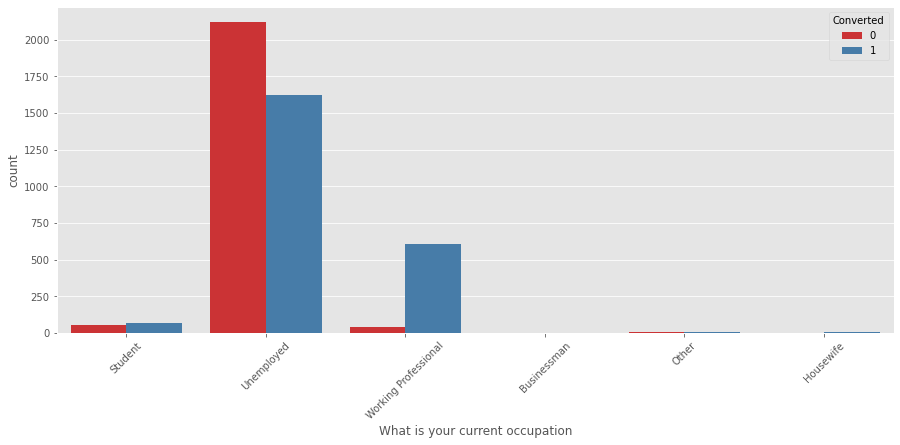

In [68]:
plt.figure(figsize=(15,6))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead,palette='Set1')
plt.xticks(rotation = 45)

####  Inference - Most of the leads are unemployed

In [69]:
#A free copy of Mastering The Interview 

(array([0]), [Text(0, 0, '0')])

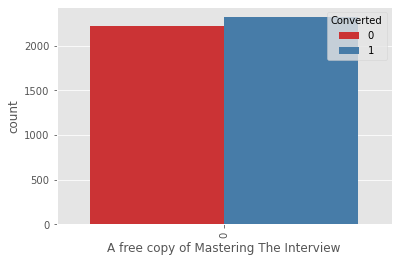

In [70]:
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead,palette='Set1')
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Email Opened'),
  Text(1, 0, 'Modified'),
  Text(2, 0, 'Page Visited on Website'),
  Text(3, 0, 'Email Bounced'),
  Text(4, 0, 'Email Link Clicked'),
  Text(5, 0, 'Unreachable'),
  Text(6, 0, 'Unsubscribed'),
  Text(7, 0, 'Had a Phone Conversation'),
  Text(8, 0, 'SMS Sent'),
  Text(9, 0, 'Approached upfront'),
  Text(10, 0, 'Olark Chat Conversation'),
  Text(11, 0, 'View in browser link Clicked'),
  Text(12, 0, 'Email Received'),
  Text(13, 0, 'Email Marked Spam')])

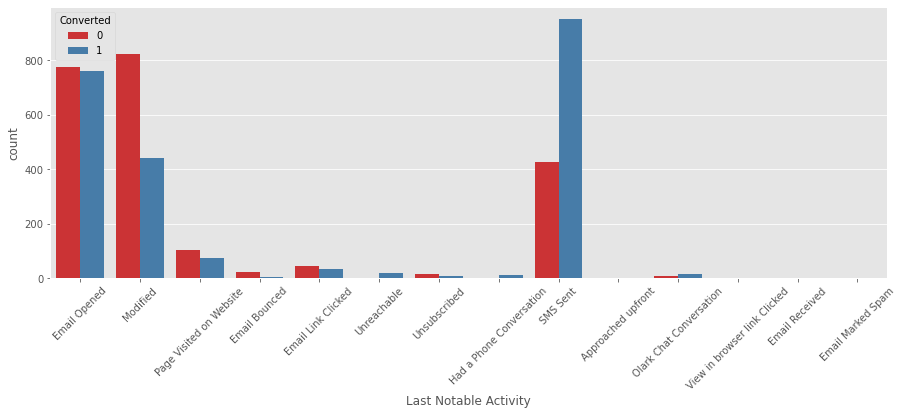

In [71]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead,palette='Set1')
plt.xticks(rotation = 45)

#### Inference - Last Notable Activity done by the leads are sms sent

#### CHECKING FOR OUTLIERS

<AxesSubplot:xlabel='TotalVisits'>

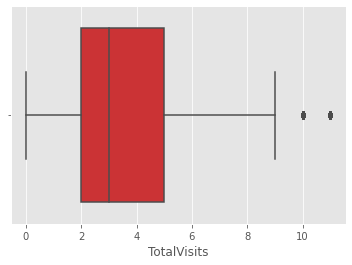

In [72]:
sns.boxplot(lead['TotalVisits'],orient='vert',palette='Set1')

<AxesSubplot:xlabel='Page Views Per Visit'>

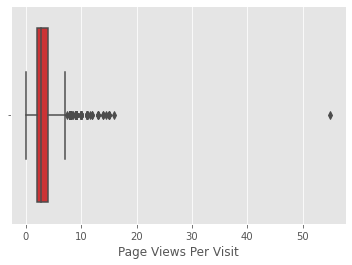

In [73]:
sns.boxplot(lead['Page Views Per Visit'],orient='vert',palette='Set1')

#### Outliers are present in large numbers 

<AxesSubplot:xlabel='Total Time Spent on Website'>

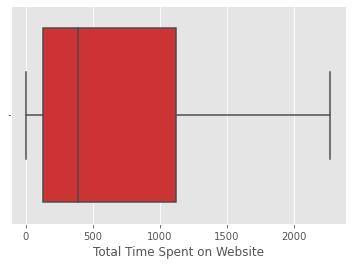

In [74]:
sns.boxplot(lead['Total Time Spent on Website'],orient='vert',palette='Set1')

<AxesSubplot:xlabel='Do Not Email'>

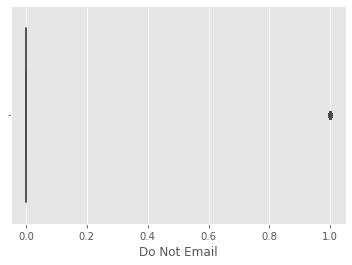

In [75]:
sns.boxplot(lead['Do Not Email'],orient='vert',palette='Set1')

<AxesSubplot:xlabel='Converted'>

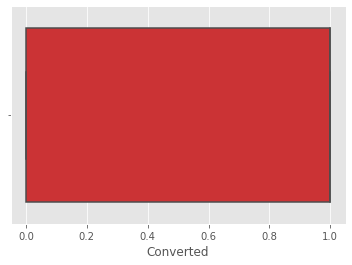

In [76]:
sns.boxplot(lead['Converted'],orient='vert',palette='Set1')

#### No outliers are present

<AxesSubplot:xlabel='A free copy of Mastering The Interview'>

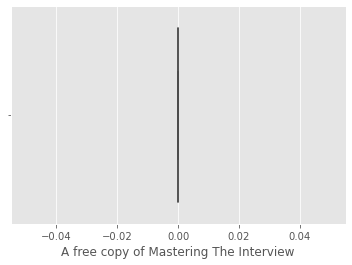

In [77]:
sns.boxplot(lead['A free copy of Mastering The Interview'],orient='vert',palette='Set1')

##### No outliers found in  a 'A free copy of Mastering The interview'

## STEP 5: Transformation/Get Dummies/Label Encoding 

In [78]:
#Creating Dummy variables for the categorical feature

In [79]:
'Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Last Notable Activity'

('Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Last Notable Activity')

In [80]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy_data = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'Last Notable Activity']], drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
10,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
11,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [81]:
 #Concatenating the dummy_data to the lead_data dataframe
lead= pd.concat([lead, dummy_data], axis=1)
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.00,Email Opened,...,1,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.00,Unreachable,...,0,0,0,1,0,0,0,0,0,0
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,0,1,2.0,1640,2.00,Email Opened,...,0,0,0,1,0,0,0,0,0,0
10,2a369e35-ca95-4ca9-9e4f-9d27175aa320,660608,Landing Page Submission,Organic Search,0,1,8.0,1351,8.00,Email Opened,...,1,0,0,0,0,0,0,0,0,0
11,9bc8ce93-6144-49e0-9f9d-080fc980f83c,660570,Landing Page Submission,Direct Traffic,0,1,8.0,1343,2.67,Page Visited on Website,...,0,0,0,0,0,1,0,0,0,0


In [82]:
#Dropping the columns for which dummies were created

In [83]:
lead = lead.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'Last Notable Activity'], axis = 1)

In [84]:
lead.head()

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,1,2.0,1532,2.00,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,1.0,305,1.00,0,1,0,...,0,0,0,1,0,0,0,0,0,0
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,0,1,2.0,1640,2.00,0,1,0,...,0,0,0,1,0,0,0,0,0,0
10,2a369e35-ca95-4ca9-9e4f-9d27175aa320,660608,0,1,8.0,1351,8.00,0,1,0,...,1,0,0,0,0,0,0,0,0,0
11,9bc8ce93-6144-49e0-9f9d-080fc980f83c,660570,0,1,8.0,1343,2.67,0,1,0,...,0,0,0,0,0,1,0,0,0,0


# Step6:Test-Train Split

In [85]:
# Putting feature variable to X
X = lead.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Lead Number,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,660727,0,2.0,1532,2.00,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,660719,0,1.0,305,1.00,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
6,660673,0,2.0,1640,2.00,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
10,660608,0,8.0,1351,8.00,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
11,660570,0,8.0,1343,2.67,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [86]:
# Putting target variable to y
y = lead['Converted']

y.head()

2     1
3     0
6     1
10    1
11    1
Name: Converted, dtype: int64

In [87]:
# Splitting the data into train and test into 70% and 30%.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling the features

In [88]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Lead Number,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2006,640238,0,2.502120,-0.648184,1.845831,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5140,610523,0,0.356190,-1.076675,-0.588172,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7588,591492,0,-0.001465,-1.044935,0.475848,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
5244,609557,0,0.713845,-0.819228,0.019187,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
8663,583649,1,2.502120,-0.762801,0.325150,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [89]:
# Checking the Lead Conversion rate
Converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100
Converted

51.06945975744212

### Correlation 

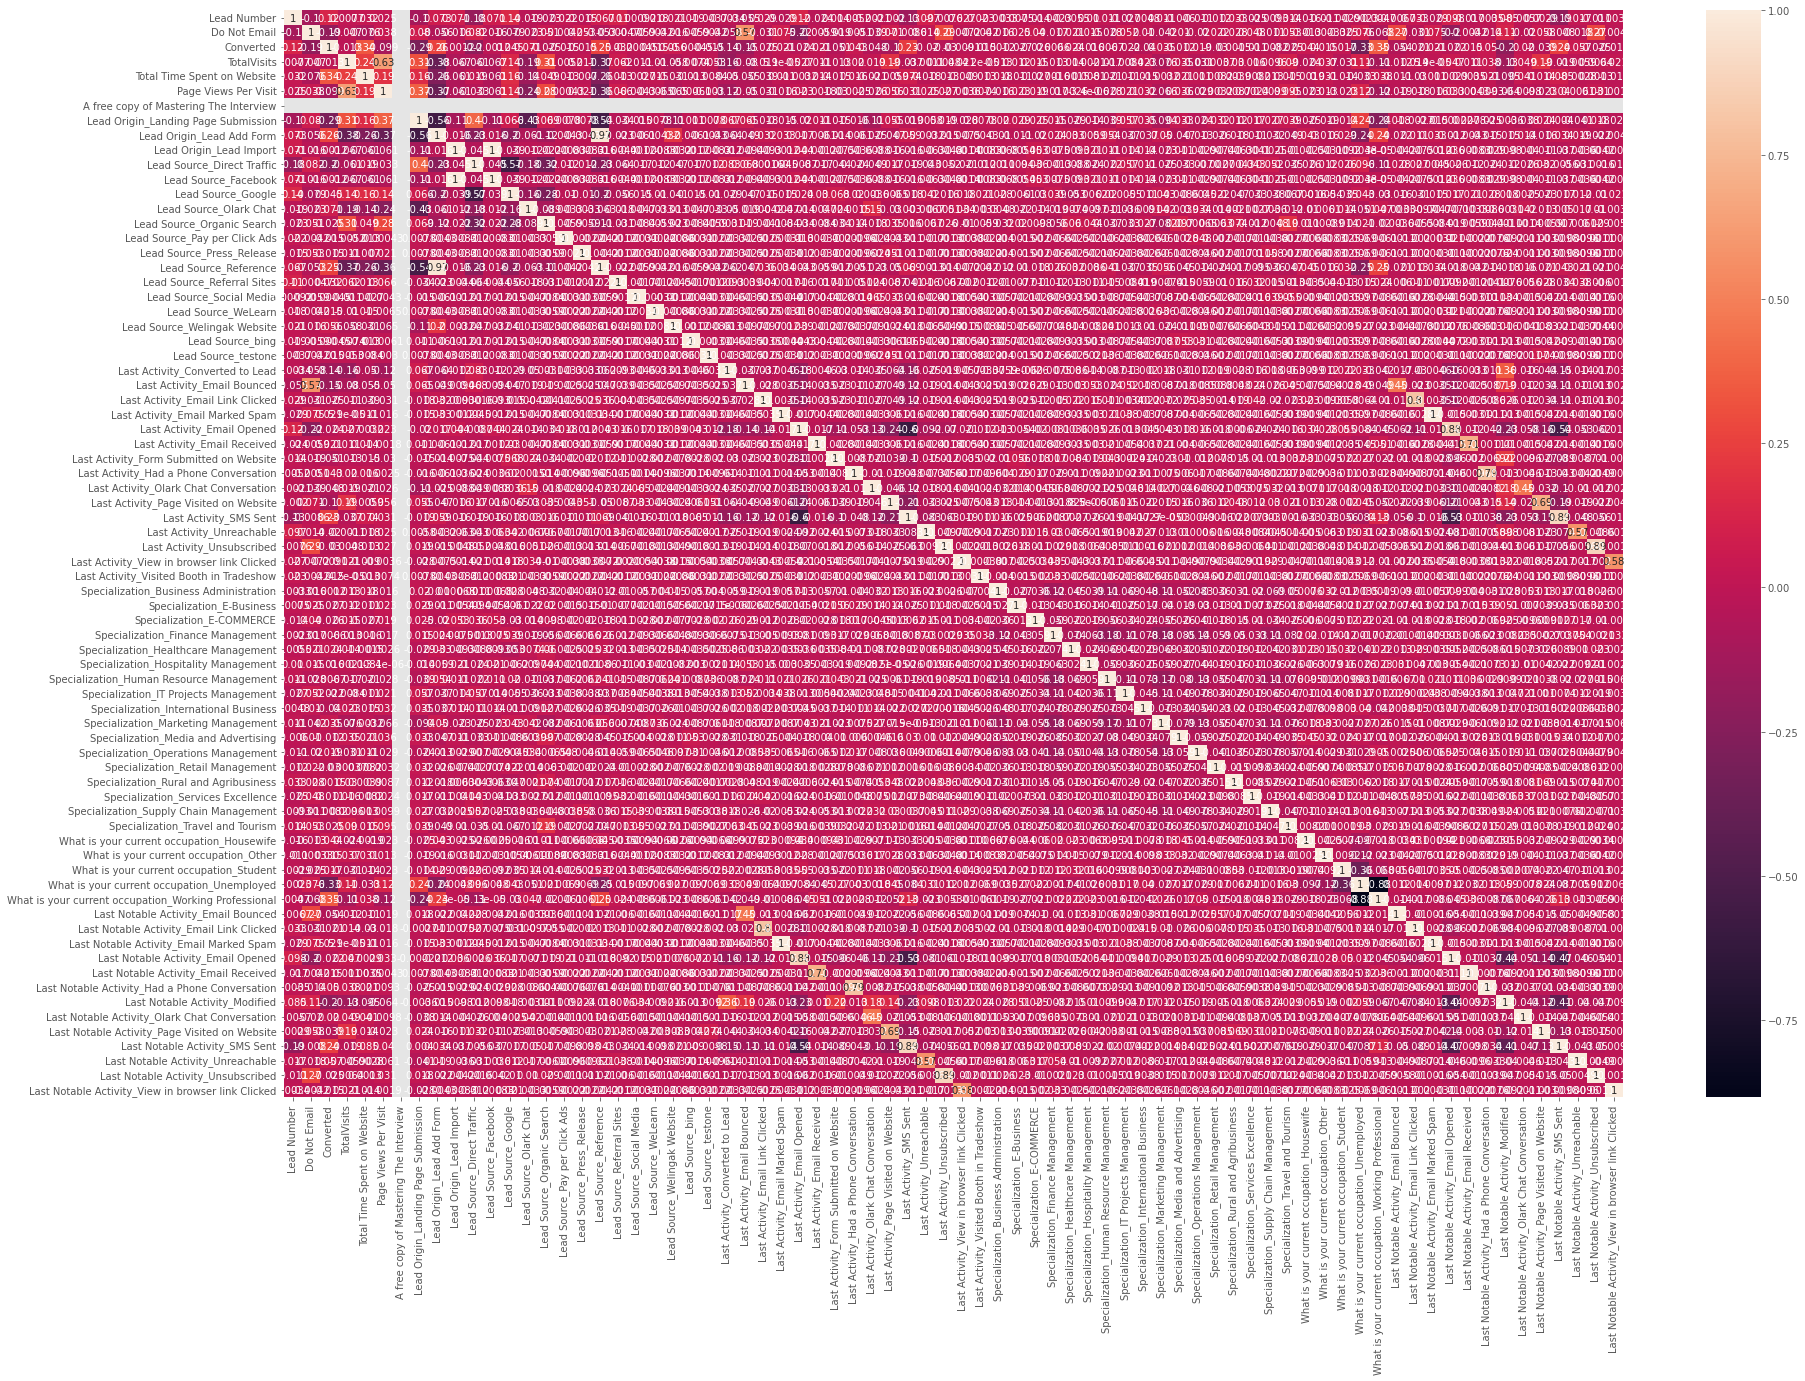

In [90]:
#Let's see the correlation matrix
plt.figure(figsize = (30,20))  #SIZE OF THE FIGURE
sns.heatmap(lead.corr(),annot = True)
plt.show()

# Step 7:Model Building

### Feature Selection Using RFE

In [91]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [92]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select = 20)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [93]:
rfe.support_

array([ True,  True, False,  True,  True, False,  True,  True, False,
        True, False,  True,  True,  True, False, False,  True, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False,  True, False, False,  True, False, False,
       False])

In [94]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', True, 1),
 ('Do Not Email', True, 1),
 ('TotalVisits', False, 10),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 54),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 38),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 39),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 41),
 ('Lead Source_Press_Release', False, 44),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 28),
 ('Lead Source_Social Media', False, 45),
 ('Lead Source_WeLearn', False, 49),
 ('Lead Source_Welingak Website', False, 24),
 ('Lead Source_bing', False, 52),
 ('Lead Source_testone', False, 43),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1

In [95]:
# Viewing columns selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['Lead Number', 'Do Not Email', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Marketing Management',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [96]:
#Accessing the model with StatsModels

## Model-1

In [97]:
# Import statsmodels

import statsmodels.api as sm

In [98]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res=logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3153
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1411.6
Date:                Sat, 04 Mar 2023   Deviance:                       2823.2
Time:                        22:24:57   Pearson chi2:                 3.57e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3913
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.3931      1.466     -3.678      0.000      -8.267      -2.519
Lead Number                                           1.136e-05   2.17e-06      5.245      0.000    7.11e-06    1.56e-05
Do Not Email                                            -1.2806      0.255     -5.025      0.000      -1.780      -0.781
Total Time Spent on Website                              1.0752      0.053     20.344      0.000       0.972       1.179
Page Views Per Visit                                    -0.0991      0.063     -1.579      0.114      -0.222       0.024
Lead Origin_Landing Page Submission                     -0.7888      0.185     -4.270      0.000      -1.151      -0.427
Lead Origin_Lead Add Form                                1.7507      0.877      1.997      0.046       0.033       3.469
Lead Source_Direct Traffic                              -0.6939      0.456     -1.521      0.128      -1.588       0.200
Lead Source_Google                                      -0.4092      0.452     -0.906      0.365      -1.295       0.476
Lead Source_Olark Chat                                   0.3630      0.492      0.738      0.461      -0.601       1.327
Lead Source_Organic Search                              -0.4886      0.466     -1.047      0.295      -1.403       0.426
Lead Source_Reference                                    0.8065      0.861      0.936      0.349      -0.882       2.495
Last Activity_Converted to Lead                         -1.0235      0.313     -3.274      0.001      -1.636      -0.411
Last Activity_Email Bounced                             -0.8692      0.562     -1.545      0.122      -1.972       0.233
Last Activity_Page Visited on Website                   -0.0539      0.185     -0.292      0.770      -0.416       0.308
Last Activity_SMS Sent                                   0.6255      0.240      2.611      0.009       0.156       1.095
Specialization_Marketing Management                     -0.0076      0.133     -0.057      0.955      -0.269       0.254
What is your current occupation_Unemployed              -0.9169      0.250     -3.670      0.000      -1.407      -0.427
What is your current occupation_Working Professional     1.8306      0.322      5.692      0.000       1.200       2.461
Last Notable Activity_Modified                          -0.5630      0.137     -4.122      0.000      -0.831      -0.295
Last Notable Activity_SMS Sent                           0.4377      0.264      1.658      0.097      -0.080       0.955
========================================================================================================================
"""

In [99]:
#There are quite a few variable which have a p-value greater than 0.05. We will need to take care of them. But first, let's also look at the VIFs.

In [100]:
#Since Pvalue of 'Specialization_Marketing Management' is very high, we can drop this column.

In [101]:
# Dropping the column 'Specialization_Marketing Management'
col = col.drop('Specialization_Marketing Management')


### Model-2

In [102]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3154
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1411.6
Date:                Sat, 04 Mar 2023   Deviance:                       2823.2
Time:                        22:25:04   Pearson chi2:                 3.57e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3913
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.3929      1.466     -3.678      0.000      -8.267      -2.519
Lead Number                                           1.136e-05   2.17e-06      5.244      0.000    7.11e-06    1.56e-05
Do Not Email                                            -1.2802      0.255     -5.025      0.000      -1.780      -0.781
Total Time Spent on Website                              1.0752      0.053     20.344      0.000       0.972       1.179
Page Views Per Visit                                    -0.0991      0.063     -1.579      0.114      -0.222       0.024
Lead Origin_Landing Page Submission                     -0.7880      0.184     -4.279      0.000      -1.149      -0.427
Lead Origin_Lead Add Form                                1.7513      0.877      1.998      0.046       0.033       3.469
Lead Source_Direct Traffic                              -0.6948      0.456     -1.524      0.128      -1.588       0.199
Lead Source_Google                                      -0.4102      0.451     -0.908      0.364      -1.295       0.475
Lead Source_Olark Chat                                   0.3623      0.492      0.737      0.461      -0.602       1.326
Lead Source_Organic Search                              -0.4890      0.466     -1.048      0.294      -1.403       0.425
Lead Source_Reference                                    0.8051      0.861      0.935      0.350      -0.882       2.493
Last Activity_Converted to Lead                         -1.0240      0.313     -3.277      0.001      -1.637      -0.412
Last Activity_Email Bounced                             -0.8704      0.562     -1.548      0.122      -1.972       0.232
Last Activity_Page Visited on Website                   -0.0541      0.185     -0.293      0.770      -0.416       0.308
Last Activity_SMS Sent                                   0.6255      0.240      2.611      0.009       0.156       1.095
What is your current occupation_Unemployed              -0.9172      0.250     -3.672      0.000      -1.407      -0.428
What is your current occupation_Working Professional     1.8304      0.322      5.691      0.000       1.200       2.461
Last Notable Activity_Modified                          -0.5629      0.137     -4.122      0.000      -0.831      -0.295
Last Notable Activity_SMS Sent                           0.4376      0.264      1.658      0.097      -0.080       0.955
========================================================================================================================
"""

In [103]:
#Since Pvalue of 'Last Notable Activity_SMS Sent' is very high, we can drop this column.

In [104]:
col = col.drop('Last Notable Activity_SMS Sent')

# Model-3

In [105]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3154
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1411.6
Date:                Sat, 04 Mar 2023   Deviance:                       2823.2
Time:                        22:25:10   Pearson chi2:                 3.57e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3913
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.3929      1.466     -3.678      0.000      -8.267      -2.519
Lead Number                                           1.136e-05   2.17e-06      5.244      0.000    7.11e-06    1.56e-05
Do Not Email                                            -1.2802      0.255     -5.025      0.000      -1.780      -0.781
Total Time Spent on Website                              1.0752      0.053     20.344      0.000       0.972       1.179
Page Views Per Visit                                    -0.0991      0.063     -1.579      0.114      -0.222       0.024
Lead Origin_Landing Page Submission                     -0.7880      0.184     -4.279      0.000      -1.149      -0.427
Lead Origin_Lead Add Form                                1.7513      0.877      1.998      0.046       0.033       3.469
Lead Source_Direct Traffic                              -0.6948      0.456     -1.524      0.128      -1.588       0.199
Lead Source_Google                                      -0.4102      0.451     -0.908      0.364      -1.295       0.475
Lead Source_Olark Chat                                   0.3623      0.492      0.737      0.461      -0.602       1.326
Lead Source_Organic Search                              -0.4890      0.466     -1.048      0.294      -1.403       0.425
Lead Source_Reference                                    0.8051      0.861      0.935      0.350      -0.882       2.493
Last Activity_Converted to Lead                         -1.0240      0.313     -3.277      0.001      -1.637      -0.412
Last Activity_Email Bounced                             -0.8704      0.562     -1.548      0.122      -1.972       0.232
Last Activity_Page Visited on Website                   -0.0541      0.185     -0.293      0.770      -0.416       0.308
Last Activity_SMS Sent                                   0.6255      0.240      2.611      0.009       0.156       1.095
What is your current occupation_Unemployed              -0.9172      0.250     -3.672      0.000      -1.407      -0.428
What is your current occupation_Working Professional     1.8304      0.322      5.691      0.000       1.200       2.461
Last Notable Activity_Modified                          -0.5629      0.137     -4.122      0.000      -0.831      -0.295
Last Notable Activity_SMS Sent                           0.4376      0.264      1.658      0.097      -0.080       0.955
========================================================================================================================
"""

In [106]:
#Since Pvalue of 'Last Activity_Page Visited on Website' is very high, we can drop this column.

In [107]:
col = col.drop('Last Activity_Page Visited on Website')

# Model-4

In [108]:
X_train_sm = sm.add_constant(X_train[col])
logm4= sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3156
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1413.0
Date:                Sat, 04 Mar 2023   Deviance:                       2825.9
Time:                        22:25:18   Pearson chi2:                 3.60e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3907
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.0410      1.448     -3.482      0.000      -7.878      -2.204
Lead Number                                           1.082e-05   2.14e-06      5.063      0.000    6.63e-06     1.5e-05
Do Not Email                                            -1.2866      0.254     -5.070      0.000      -1.784      -0.789
Total Time Spent on Website                              1.0755      0.053     20.359      0.000       0.972       1.179
Page Views Per Visit                                    -0.0971      0.063     -1.549      0.121      -0.220       0.026
Lead Origin_Landing Page Submission                     -0.7763      0.184     -4.225      0.000      -1.136      -0.416
Lead Origin_Lead Add Form                                1.7709      0.878      2.017      0.044       0.050       3.492
Lead Source_Direct Traffic                              -0.7045      0.455     -1.549      0.121      -1.596       0.187
Lead Source_Google                                      -0.4109      0.450     -0.912      0.362      -1.294       0.472
Lead Source_Olark Chat                                   0.3850      0.491      0.784      0.433      -0.578       1.348
Lead Source_Organic Search                              -0.4986      0.465     -1.071      0.284      -1.411       0.413
Lead Source_Reference                                    0.8027      0.862      0.931      0.352      -0.888       2.493
Last Activity_Converted to Lead                         -0.9267      0.305     -3.041      0.002      -1.524      -0.329
Last Activity_Email Bounced                             -0.8147      0.558     -1.460      0.144      -1.909       0.279
Last Activity_SMS Sent                                   0.9852      0.103      9.529      0.000       0.783       1.188
What is your current occupation_Unemployed              -0.9169      0.250     -3.671      0.000      -1.406      -0.427
What is your current occupation_Working Professional     1.8325      0.322      5.697      0.000       1.202       2.463
Last Notable Activity_Modified                          -0.6809      0.116     -5.872      0.000      -0.908      -0.454
========================================================================================================================
"""

In [109]:
#Since Pvalue of 'Last Activity_Email Bounced' is very high, we can drop this column.

In [110]:
col = col.drop('Last Activity_Email Bounced')

# Model-5

In [111]:
X_train_sm = sm.add_constant(X_train[col])
logm5= sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3157
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1414.1
Date:                Sat, 04 Mar 2023   Deviance:                       2828.3
Time:                        22:25:26   Pearson chi2:                 3.60e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3903
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.0183      1.447     -3.467      0.001      -7.855      -2.182
Lead Number                                           1.079e-05   2.13e-06      5.054      0.000    6.61e-06     1.5e-05
Do Not Email                                            -1.4623      0.229     -6.383      0.000      -1.911      -1.013
Total Time Spent on Website                              1.0765      0.053     20.377      0.000       0.973       1.180
Page Views Per Visit                                    -0.0904      0.063     -1.444      0.149      -0.213       0.032
Lead Origin_Landing Page Submission                     -0.7773      0.183     -4.241      0.000      -1.137      -0.418
Lead Origin_Lead Add Form                                1.7777      0.879      2.023      0.043       0.056       3.500
Lead Source_Direct Traffic                              -0.7151      0.456     -1.569      0.117      -1.608       0.178
Lead Source_Google                                      -0.4230      0.451     -0.937      0.349      -1.307       0.462
Lead Source_Olark Chat                                   0.3862      0.492      0.785      0.433      -0.578       1.351
Lead Source_Organic Search                              -0.5135      0.466     -1.101      0.271      -1.427       0.400
Lead Source_Reference                                    0.8085      0.863      0.937      0.349      -0.883       2.500
Last Activity_Converted to Lead                         -0.9031      0.304     -2.967      0.003      -1.500      -0.307
Last Activity_SMS Sent                                   1.0007      0.103      9.713      0.000       0.799       1.203
What is your current occupation_Unemployed              -0.9136      0.250     -3.651      0.000      -1.404      -0.423
What is your current occupation_Working Professional     1.8320      0.321      5.700      0.000       1.202       2.462
Last Notable Activity_Modified                          -0.6960      0.115     -6.031      0.000      -0.922      -0.470
========================================================================================================================
"""

In [112]:
#Checking for VIF values

In [113]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Number,109.19
6,Lead Source_Direct Traffic,36.02
7,Lead Source_Google,30.49
13,What is your current occupation_Unemployed,24.65
5,Lead Origin_Lead Add Form,24.10
10,Lead Source_Reference,19.57
9,Lead Source_Organic Search,13.22
4,Lead Origin_Landing Page Submission,11.47
14,What is your current occupation_Working Profes...,5.24
8,Lead Source_Olark Chat,5.20


In [114]:
# Dropping the column  'Lead Number' because it has high VIF
col = col.drop('Lead Number')

# Model-6

In [115]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3158
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1427.0
Date:                Sat, 04 Mar 2023   Deviance:                       2854.0
Time:                        22:25:32   Pearson chi2:                 3.68e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3853
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.8405      0.505      3.645      0.000       0.851       2.830
Do Not Email                                            -1.5107      0.228     -6.638      0.000      -1.957      -1.065
Total Time Spent on Website                              1.0822      0.053     20.577      0.000       0.979       1.185
Page Views Per Visit                                    -0.0682      0.062     -1.099      0.272      -0.190       0.053
Lead Origin_Landing Page Submission                     -0.8158      0.182     -4.477      0.000      -1.173      -0.459
Lead Origin_Lead Add Form                                1.6625      0.869      1.913      0.056      -0.041       3.366
Lead Source_Direct Traffic                              -0.9778      0.448     -2.184      0.029      -1.855      -0.100
Lead Source_Google                                      -0.6120      0.444     -1.377      0.168      -1.483       0.259
Lead Source_Olark Chat                                   0.1269      0.484      0.262      0.793      -0.822       1.076
Lead Source_Organic Search                              -0.7716      0.458     -1.685      0.092      -1.669       0.126
Lead Source_Reference                                    0.7950      0.865      0.920      0.358      -0.900       2.490
Last Activity_Converted to Lead                         -0.9178      0.298     -3.075      0.002      -1.503      -0.333
Last Activity_SMS Sent                                   0.9198      0.101      9.111      0.000       0.722       1.118
What is your current occupation_Unemployed              -0.8509      0.246     -3.459      0.001      -1.333      -0.369
What is your current occupation_Working Professional     1.8457      0.318      5.806      0.000       1.223       2.469
Last Notable Activity_Modified                          -0.6364      0.114     -5.573      0.000      -0.860      -0.413
========================================================================================================================
"""

In [116]:
# Dropping the column  'Lead Source_Olark Chat' because it has high Pvalue
col = col.drop('Lead Source_Olark Chat')

# Model 7

In [118]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3159
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1427.1
Date:                Sat, 04 Mar 2023   Deviance:                       2854.1
Time:                        22:26:04   Pearson chi2:                 3.68e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3853
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.9451      0.310      6.277      0.000       1.338       2.552
Do Not Email                                            -1.5100      0.227     -6.638      0.000      -1.956      -1.064
Total Time Spent on Website                              1.0818      0.053     20.581      0.000       0.979       1.185
Page Views Per Visit                                    -0.0697      0.062     -1.127      0.260      -0.191       0.051
Lead Origin_Landing Page Submission                     -0.8238      0.180     -4.581      0.000      -1.176      -0.471
Lead Origin_Lead Add Form                                1.5804      0.810      1.951      0.051      -0.008       3.168
Lead Source_Direct Traffic                              -1.0731      0.261     -4.107      0.000      -1.585      -0.561
Lead Source_Google                                      -0.7079      0.253     -2.799      0.005      -1.204      -0.212
Lead Source_Organic Search                              -0.8666      0.280     -3.093      0.002      -1.416      -0.317
Lead Source_Reference                                    0.7714      0.861      0.896      0.370      -0.916       2.458
Last Activity_Converted to Lead                         -0.9213      0.298     -3.088      0.002      -1.506      -0.337
Last Activity_SMS Sent                                   0.9209      0.101      9.129      0.000       0.723       1.119
What is your current occupation_Unemployed              -0.8528      0.246     -3.468      0.001      -1.335      -0.371
What is your current occupation_Working Professional     1.8445      0.318      5.802      0.000       1.221       2.468
Last Notable Activity_Modified                          -0.6361      0.114     -5.571      0.000      -0.860      -0.412
========================================================================================================================
"""

In [119]:
#Checking for VIF values:

In [120]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
4,Lead Origin_Lead Add Form,20.10
8,Lead Source_Reference,19.39
3,Lead Origin_Landing Page Submission,11.23
11,What is your current occupation_Unemployed,10.94
5,Lead Source_Direct Traffic,10.13
6,Lead Source_Google,7.72
7,Lead Source_Organic Search,4.05
12,What is your current occupation_Working Profes...,2.70
10,Last Activity_SMS Sent,1.66
13,Last Notable Activity_Modified,1.64


In [121]:
# Dropping the column  'Lead Origin_Lead Add Form' to reduce the variables
col = col.drop('Lead Origin_Lead Add Form')


# Model 8

In [122]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3160
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1429.5
Date:                Sat, 04 Mar 2023   Deviance:                       2858.9
Time:                        22:26:28   Pearson chi2:                 3.68e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3844
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.0323      0.308      6.601      0.000       1.429       2.636
Do Not Email                                            -1.5188      0.228     -6.673      0.000      -1.965      -1.073
Total Time Spent on Website                              1.0795      0.053     20.552      0.000       0.977       1.182
Page Views Per Visit                                    -0.0738      0.062     -1.195      0.232      -0.195       0.047
Lead Origin_Landing Page Submission                     -0.8397      0.180     -4.669      0.000      -1.192      -0.487
Lead Source_Direct Traffic                              -1.1520      0.259     -4.448      0.000      -1.660      -0.644
Lead Source_Google                                      -0.7862      0.251     -3.137      0.002      -1.277      -0.295
Lead Source_Organic Search                              -0.9440      0.278     -3.393      0.001      -1.489      -0.399
Lead Source_Reference                                    2.2476      0.378      5.938      0.000       1.506       2.989
Last Activity_Converted to Lead                         -0.9301      0.298     -3.120      0.002      -1.515      -0.346
Last Activity_SMS Sent                                   0.9188      0.101      9.117      0.000       0.721       1.116
What is your current occupation_Unemployed              -0.8437      0.246     -3.430      0.001      -1.326      -0.362
What is your current occupation_Working Professional     1.8424      0.318      5.794      0.000       1.219       2.466
Last Notable Activity_Modified                          -0.6321      0.114     -5.548      0.000      -0.855      -0.409
========================================================================================================================
"""

In [123]:
#Checking for VIF values:

In [124]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,11.22
10,What is your current occupation_Unemployed,10.63
4,Lead Source_Direct Traffic,10.03
5,Lead Source_Google,7.64
6,Lead Source_Organic Search,4.02
11,What is your current occupation_Working Profes...,2.66
7,Lead Source_Reference,1.80
9,Last Activity_SMS Sent,1.66
12,Last Notable Activity_Modified,1.64
2,Page Views Per Visit,1.36


In [125]:
# Dropping the column  'Lead Origin_Landing Page Submission' to reduce the variables
col = col.drop('Lead Origin_Landing Page Submission')

In [126]:
col=col.drop('What is your current occupation_Unemployed')

# Model 9

In [127]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3162
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1447.0
Date:                Sat, 04 Mar 2023   Deviance:                       2894.1
Time:                        22:26:55   Pearson chi2:                 3.73e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3775
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1355      0.198      5.730      0.000       0.747       1.524
Do Not Email                                            -1.5254      0.225     -6.766      0.000      -1.967      -1.084
Total Time Spent on Website                              1.0860      0.052     20.773      0.000       0.984       1.188
Page Views Per Visit                                    -0.1063      0.061     -1.744      0.081      -0.226       0.013
Lead Source_Direct Traffic                              -1.8846      0.207     -9.117      0.000      -2.290      -1.479
Lead Source_Google                                      -1.4068      0.213     -6.607      0.000      -1.824      -0.990
Lead Source_Organic Search                              -1.5710      0.243     -6.453      0.000      -2.048      -1.094
Lead Source_Reference                                    2.3290      0.377      6.172      0.000       1.589       3.069
Last Activity_Converted to Lead                         -0.9456      0.295     -3.200      0.001      -1.525      -0.367
Last Activity_SMS Sent                                   0.8772      0.100      8.804      0.000       0.682       1.072
What is your current occupation_Working Professional     2.7007      0.213     12.672      0.000       2.283       3.118
Last Notable Activity_Modified                          -0.6062      0.113     -5.378      0.000      -0.827      -0.385
========================================================================================================================
"""

In [128]:
col=col.drop('Page Views Per Visit')

In [1458]:
#Checking for VIF values:

In [129]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
9,Last Notable Activity_Modified,1.61
7,Last Activity_SMS Sent,1.60
2,Lead Source_Direct Traffic,1.48
3,Lead Source_Google,1.44
5,Lead Source_Reference,1.27
8,What is your current occupation_Working Profes...,1.25
6,Last Activity_Converted to Lead,1.22
4,Lead Source_Organic Search,1.21
0,Do Not Email,1.14
1,Total Time Spent on Website,1.13


In [130]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3163
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1448.6
Date:                Sat, 04 Mar 2023   Deviance:                       2897.2
Time:                        22:37:16   Pearson chi2:                 3.74e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3769
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2425      0.189      6.575      0.000       0.872       1.613
Do Not Email                                            -1.5312      0.226     -6.786      0.000      -1.973      -1.089
Total Time Spent on Website                              1.0829      0.052     20.744      0.000       0.981       1.185
Lead Source_Direct Traffic                              -1.9882      0.199    -10.012      0.000      -2.377      -1.599
Lead Source_Google                                      -1.5370      0.200     -7.684      0.000      -1.929      -1.145
Lead Source_Organic Search                              -1.7526      0.221     -7.943      0.000      -2.185      -1.320
Lead Source_Reference                                    2.3594      0.377      6.259      0.000       1.621       3.098
Last Activity_Converted to Lead                         -0.8819      0.294     -3.003      0.003      -1.458      -0.306
Last Activity_SMS Sent                                   0.8679      0.099      8.736      0.000       0.673       1.063
What is your current occupation_Working Professional     2.7024      0.213     12.688      0.000       2.285       3.120
Last Notable Activity_Modified                          -0.6000      0.113     -5.332      0.000      -0.821      -0.379
========================================================================================================================
"""

In [131]:
#Since the P-values of all variables is 0 and VIF values are low for all the variables, model-9 is our final model. We have 11 variables in our final model.

### Step 8:Making Prediction on the Train  and Test set

In [132]:
# Getting the predicted values
y_train_pred=res.predict(X_train_sm)
y_train_pred[:10]

2006    0.229340
5140    0.112994
7588    0.166667
5244    0.317555
8663    0.037263
734     0.062545
4481    0.917815
971     0.519025
5106    0.252945
869     0.120474
dtype: float64

In [133]:
#Reshaping into array
y_train_pred = y_train_pred.values.reshape(-1)

y_train_pred [:10]

array([0.22934049, 0.11299429, 0.16666716, 0.31755547, 0.03726334,
       0.06254463, 0.91781493, 0.51902459, 0.25294512, 0.12047401])

In [134]:
# Creating a dataframe with actualy converted and predicted probabilities 
y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_prob':y_train_pred})
y_train_pred_final['Prospect_ID']=y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect_ID
0,0,0.229340,2006
1,0,0.112994,5140
2,1,0.166667,7588
3,0,0.317555,5244
4,0,0.037263,8663


In [135]:
# Creating a new column 'predicted' with 1 if churn_prob > 0.5 else 0
y_train_pred_final['predicted']=y_train_pred_final.Converted_prob.map(lambda x: 1 if x >0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect_ID,predicted
0,0,0.229340,2006,0
1,0,0.112994,5140,0
2,1,0.166667,7588,0
3,0,0.317555,5244,0
4,0,0.037263,8663,0


In [136]:
from sklearn import metrics
confusion=metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion)

[[1266  287]
 [ 349 1272]]


In [137]:
#Let's check the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted))

0.7996219281663516


In [138]:
#Metrics beyond simply accuracy

In [139]:
TP = confusion[1,1]  #true positive
TN = confusion[0,0]  #true negative 
FP = confusion[0,1]   #false positive
FN = confusion[1,0]   #false negative

In [140]:
#Let's see the sensitivity of our logistic  regression model
TP/float(TP+FN)

0.7847008019740901

In [141]:
#lET'S CALCULATE SPECIFICITY
TN/float(TN+FP)

0.815196394075982

In [142]:
#Calculte the false positive rate - predicting churn when customer does not have churned
print(FP/float(TN+FP))

0.18480360592401804


In [143]:
#POSITIVE PREDICTIVE VALUE
print(TP/float(TP+FP))

0.8159076330981399


In [144]:
#NEGATIVE PREDICTIVE VALUE
print(TN/float(TN+FN))

0.7839009287925697


# Step 9:Plotting the ROC Curve

In [145]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None    

In [146]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

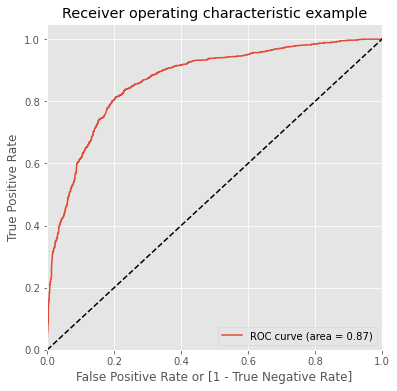

In [147]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [148]:
#Since we have higher (0.89) area under the ROC curve , therefore our model is a good on

In [149]:
#Step10:Finding Optimal Cutoff Point

In [150]:
#Let's create column with different probability cut-off' s 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.229340,2006,0,1,1,1,0,0,0,0,0,0,0
1,0,0.112994,5140,0,1,1,0,0,0,0,0,0,0,0
2,1,0.166667,7588,0,1,1,0,0,0,0,0,0,0,0
3,0,0.317555,5244,0,1,1,1,1,0,0,0,0,0,0
4,0,0.037263,8663,0,1,0,0,0,0,0,0,0,0,0


In [151]:
  # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.510712  1.000000  0.000000
0.1   0.1  0.582546  0.988896  0.158403
0.2   0.2  0.688721  0.946329  0.419833
0.3   0.3  0.772842  0.908081  0.631681
0.4   0.4  0.799307  0.849476  0.746941
0.5   0.5  0.799622  0.784701  0.815196
0.6   0.6  0.775047  0.688464  0.865422
0.7   0.7  0.752993  0.605182  0.907276
0.8   0.8  0.699118  0.468229  0.940116
0.9   0.9  0.644928  0.323257  0.980683


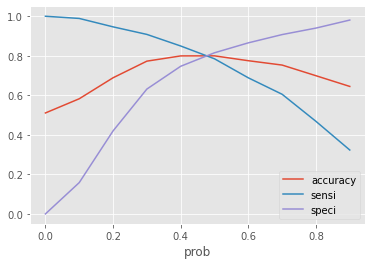

In [152]:
#Let's plot accuracy sensitivity and specificity for various probabilities 
cutoff_df.plot.line(x = 'prob', y = ['accuracy','sensi','speci'])
plt.show()

In [153]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.229340,2006,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.112994,5140,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.166667,7588,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.317555,5244,0,1,1,1,1,0,0,0,0,0,0,0
4,0,0.037263,8663,0,1,0,0,0,0,0,0,0,0,0,0


In [154]:
#Assigning Lead Score to the Training data

In [155]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.229340,2006,0,1,1,1,0,0,0,0,0,0,0,0,23
1,0,0.112994,5140,0,1,1,0,0,0,0,0,0,0,0,0,11
2,1,0.166667,7588,0,1,1,0,0,0,0,0,0,0,0,0,17
3,0,0.317555,5244,0,1,1,1,1,0,0,0,0,0,0,0,32
4,0,0.037263,8663,0,1,0,0,0,0,0,0,0,0,0,0,4


### Model Evaluation

In [156]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.7844990548204159


In [157]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1053,  500],
       [ 184, 1437]], dtype=int64)

In [158]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [159]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8864898210980876


In [160]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.6780424983902125


In [161]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.32195750160978753


In [162]:
# Positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7418688693856479


In [163]:
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.85125303152789


In [164]:
#Precision and Recall

In [165]:
##Precision = Also known as Positive Predictive Value, it refers to the percentage of the results which are relevant.
##Recall = Also known as Sensitivity , it refers to the percentage of total relevant results correctly classified by the algorithm

In [166]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[1266,  287],
       [ 349, 1272]], dtype=int64)

In [167]:
# Precision
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.8159076330981399


In [168]:
# Recall
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.7847008019740901


### Precision and recall tradeoff

In [169]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       0
 4       0
        ..
 3169    1
 3170    0
 3171    1
 3172    1
 3173    1
 Name: Converted, Length: 3174, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 3169    0
 3170    1
 3171    1
 3172    1
 3173    1
 Name: predicted, Length: 3174, dtype: int64)

In [170]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

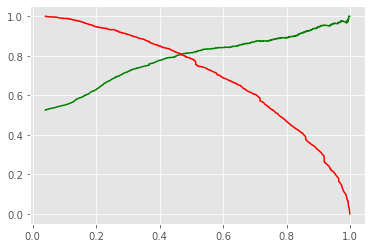

In [171]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

**The above graph shows the trade-off between the Precision and Recall

#### Making predictions on the test set

### Scaling the test data

In [172]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [173]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_SMS Sent,What is your current occupation_Working Professional,Last Notable Activity_Modified
8536,0,-1.039645,1,0,0,0,0,1,0,0
945,0,-0.366050,0,1,0,0,1,0,0,1
1550,0,-1.097835,0,0,0,1,0,0,0,1
8570,0,-0.685214,0,1,0,0,0,0,1,0
1410,0,-0.579414,0,0,1,0,0,0,0,0


In [174]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred=res.predict(X_test_sm)
y_test_pred[:10]

8536    0.268209
945     0.102215
1550    0.859730
8570    0.841014
1410    0.242768
5664    0.918680
5232    0.040451
6744    0.312522
6924    0.329468
3878    0.220221
dtype: float64

In [175]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [176]:
# Let's see the head
y_pred_1.head()

,0
8536,0.268209
945,0.102215
1550,0.859730
8570,0.841014
1410,0.242768


In [177]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [178]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [179]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [180]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [181]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,8536,0.268209
1,0,945,0.102215
2,1,1550,0.859730
3,1,8570,0.841014
4,0,1410,0.242768


In [182]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [183]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [184]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,8536,0,0.268209
1,945,0,0.102215
2,1550,1,0.859730
3,8570,1,0.841014
4,1410,0,0.242768


In [185]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

In [186]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,8536,0,0.268209,0
1,945,0,0.102215,0
2,1550,1,0.859730,1
3,8570,1,0.841014,1
4,1410,0,0.242768,0


In [187]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.7817781043350478


In [188]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[446, 220],
       [ 77, 618]], dtype=int64)

In [189]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [190]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.8892086330935252


In [191]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.6696696696696697


In [192]:
#Assigning Lead Score to the Testing data

In [193]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,8536,0,0.268209,0,27
1,945,0,0.102215,0,10
2,1550,1,0.859730,1,86
3,8570,1,0.841014,1,84
4,1410,0,0.242768,0,24


# Observations:

#### After running the model on the Test Data , we obtain:

Accuracy : 78.4 %
Sensitivity : 89.0%
Specificity : 67.3 %  

## Results :

### 1) Comparing the values obtained for Train & Test:

#### Train Data:

Accuracy : 79.9%
Sensitivity : 78.5%
Specificity:81.4%

#### Test Data:

Accuracy : 78.4 %
Sensitivity : 89.0%
Specificity : 67.3 %  

### 2) Finding out the leads which should be contacted:

In [ ]:
##The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 85. They can be termed as 'Hot Leads'.

In [198]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
2,1550,1,0.859730,1,86
5,5664,0,0.918680,1,92
10,948,1,0.925585,1,93
12,7327,1,0.869910,1,87
15,5051,1,0.917815,1,92
...,...,...,...,...,...
1330,2380,1,0.917815,1,92
1331,1475,1,0.971517,1,97
1332,4773,1,0.997486,1,100
1343,3575,1,0.963769,1,96


In [199]:
#So there are 321 leads which can be contacted and have a high chance of getting converted. The Prospect ID of the customers to be contacted are :

In [200]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([1550, 5664,  948, 7327, 5051, 5964, 3570, 8112, 1481, 3926, 2765,
       7501, 4382, 2617, 1339, 4868, 4793, 1957, 2158, 1141,  846, 7432,
       5490, 3162, 4934, 1470, 7121, 6375, 3758,  819, 5032, 2672, 7089,
       7259, 8079, 1424,  954, 2473, 4856, 6705, 2206, 8085, 2665, 7707,
        556, 4297, 2673, 1324, 8413, 7537, 3060, 2543, 6687, 2560, 4613,
       7927, 2748, 1803, 2804, 2019, 4788, 3522,  810, 1867, 4942, 8184,
       8521,  560, 2043, 2878, 8030, 2623, 4982, 2575, 5197, 7018, 5300,
       6785,   18, 1263, 5687, 9196,  320, 8060, 4365, 6461, 1292, 2547,
       7817, 7168, 2984, 5049,  448, 4789, 7570, 2161, 8902, 1770, 5423,
       1572, 5825, 7495, 4997, 2655, 6792, 6127, 7105, 2013, 3535, 9219,
       2630, 6740, 4573, 4008,  973, 5723,  841, 4832, 7082, 7420, 2011,
       3566, 6771, 4371, 6066, 3113,  454, 5937, 7113, 3207, 4125, 7091,
       4939, 3814, 4360, 7496, 5586, 1305, 3212,  356,  718, 1567, 6010,
       3937, 4505, 2483, 6242, 5932, 6480, 7521, 70

### 3) Finding out the Important Features from our final model:

In [201]:
res.params.sort_values(ascending=False)

What is your current occupation_Working Professional    2.702395
Lead Source_Reference                                   2.359447
const                                                   1.242475
Total Time Spent on Website                             1.082950
Last Activity_SMS Sent                                  0.867904
Last Notable Activity_Modified                         -0.599976
Last Activity_Converted to Lead                        -0.881906
Do Not Email                                           -1.531165
Lead Source_Google                                     -1.537028
Lead Source_Organic Search                             -1.752563
Lead Source_Direct Traffic                             -1.988225
dtype: float64

In [202]:
#SUMMARY
#The company should make calls to the leads coming from the lead sources "Welingak Websites" and "Reference" as these are more likely to get converted.
#The company should make calls to the leads who are the "working professionals" as they are more likely to get converted.
#The company should make calls to the leads who spent "more time on the websites" as these are more likely to get converted.
#The company should make calls to the leads coming from the lead sources "Olark Chat" as these are more likely to get converted.
#The company should make calls to the leads whose last activity was SMS Sent as they are more likely to get converted.
